In [4]:
# Imports
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import onnxmltools
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import pandas as pd


In [5]:
#"""
# Model 1
# source: https://medium.com/geekculture/steganography-and-steganalaysis-with-cnn-9bd738dfed6f
model = Sequential()
model.add(Conv2D(128, kernel_size = (3, 3), activation='relu', input_shape=(200,200,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
#"""

"""
# MODEL 2
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
"""

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 128)     1280      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 99, 99, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 99, 99, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 97, 97, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                      

"\n# MODEL 2\nmodel = Sequential()\n\nmodel.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))\nmodel.add(MaxPooling2D((2,2)))\n\nmodel.add(Conv2D(32, (3,3), activation = 'relu'))\nmodel.add(MaxPooling2D((2,2)))\n\nmodel.add(Flatten())\nmodel.add(Dense(64, activation = 'relu'))\nmodel.add(Dense(1, activation = 'sigmoid'))\n\nmodel.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])\n"

In [6]:
# Loading data
data_dir = './data'
imgs = {}
for image_class in os.listdir(data_dir):
    imgs[image_class] = {}
    for image in os.listdir(os.path.join(data_dir, image_class)):
        im = cv2.imread(os.path.join(data_dir, image_class, image))
        im = cv2.resize(im, (200, 200))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        imgs[image_class][image] = im
imgs['Cover']['00045.jpg'][0]


array([107, 101, 100, 108, 119, 120, 123, 113, 116, 114, 112, 122, 133,
       111, 125, 131, 128, 136, 131, 138, 137, 134, 105, 117, 108, 115,
       116, 119, 133, 135,  92,  95, 120, 143, 146, 142, 142, 116, 136,
       137, 118, 126, 108, 104, 145, 142, 143, 139, 125, 134, 134, 127,
       134, 143, 142, 128, 138, 121, 100, 140, 144, 121, 134, 142, 138,
       146, 131, 111, 143, 116, 154, 150, 148, 144, 139, 131, 103, 149,
       142, 153, 150, 136, 107, 148, 146, 141, 153, 152, 152, 149, 148,
       141, 142, 143, 149, 149, 143, 126, 154, 153, 157, 152, 144, 141,
       129, 107, 142, 141, 149, 132, 114, 139, 139, 141, 147, 140, 133,
       130, 147, 129, 120, 152, 150, 127, 152, 147, 142, 155, 155, 138,
       125, 128, 143, 157, 154, 157, 154, 157, 143, 125, 149, 151,  99,
        88, 129, 145, 140, 135, 125, 115, 144, 139, 121, 123, 131, 138,
       127, 154, 159, 156, 156, 155, 154, 153, 153, 156, 155, 156, 156,
       145, 154, 155, 156, 159, 158, 156, 151, 154, 158, 158, 13

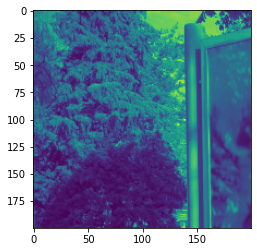

In [7]:
plt.imshow(imgs['Cover']['00001.jpg'])


In [8]:
# Training
size = len(imgs['Cover'])
X = []
Y = []
for img in sorted(imgs['Cover'].keys()):
    img_number = int(img.split('.')[0])
    if img_number < size/2:
        X.append(imgs['Cover'][img])
        Y.append(0)
    else:
        X.append(imgs['JMiPOD'][img])
        Y.append(1)

In [9]:
X = np.array(X)
Y = np.array(Y)


In [10]:
Y.shape

(921,)

In [11]:
model.fit(X, Y, epochs = 5, batch_size = 64)


Epoch 1/5


2022-10-24 00:24:31.448895: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1284636672 exceeds 10% of free system memory.
2022-10-24 00:24:32.620746: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 321159168 exceeds 10% of free system memory.
2022-10-24 00:24:33.061847: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 321159168 exceeds 10% of free system memory.
2022-10-24 00:24:35.403195: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 321159168 exceeds 10% of free system memory.
2022-10-24 00:24:38.317022: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 321159168 exceeds 10% of free system memory.


15/15 [==============================] - 152s 10s/step - loss: 0.8353
Epoch 2/5
15/15 [==============================] - 156s 10s/step - loss: 0.6181
Epoch 3/5
15/15 [==============================] - 157s 10s/step - loss: 0.4665
Epoch 4/5
15/15 [==============================] - 158s 10s/step - loss: 0.4019
Epoch 5/5
15/15 [==============================] - 158s 10s/step - loss: 0.3757


In [12]:
model.save('./model')
onnx_model = onnxmltools.convert_keras(model)
onnxmltools.utils.save_model(onnx_model, './model/model.onnx')


INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets
2022-10-24 00:37:40.276650: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2022-10-24 00:37:40.278171: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-10-24 00:37:40.502295: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2022-10-24 00:37:40.502508: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


In [14]:
x = np.array(imgs['Cover']['00097.jpg']).reshape(1, 200, 200, 1)
model.predict(x)


1/1 [==============================] - 0s 385ms/step


array([[0.49847335]], dtype=float32)

In [15]:
x = np.array(imgs['JMiPOD']['00096.jpg']).reshape(1, 200, 200, 1)
model.predict(x)

1/1 [==============================] - 0s 67ms/step


array([[0.20706467]], dtype=float32)

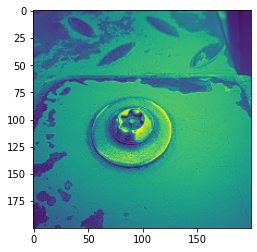

In [32]:
name = '00108.jpg'
x = imgs['Cover'][name]
cv2.imwrite('./ex2.jpg', x)
plt.imshow(x)


In [34]:
x = np.array(x).reshape(1, 200, 200, 1)
model.predict(x)


1/1 [==============================] - 0s 85ms/step


array([[-0.4886696]], dtype=float32)